# Analysis of met and met phi corrections

The goal is to minimize the chi squared of the bins events in bins by shifting mc values to achieved a better a agreement between data and mc.


In [19]:
run ../prep_ana.py

Loading plotting specs...
8 or 13 TeV:
Loading 8TeV
unc_mc_process and scales as dictionaries
Load MC and Data?False
df = pd.concat([df_dy0, df_dy1, df_dy2, df_dy3, df_dy4, df_dy_m_10, df_ww, df_tt_l, df_tt_sl, df_zz_ln, df_wz_ln, df_wz_lq ])


In [2]:
%matplotlib inline

# MET Analysis

In [3]:
df_da_b = rp.read_root(data_path+"/muon_2016B_complete.root")

df_da = pd.concat([df_da_b, ])

In [7]:
alpha = 1.055
a = df.metMod.values * 1.
a[ df.process.values == "DY"]= a[ df.process.values == "DY"] * alpha
df["metMod_corrected"] = a

bins_mc = bin_df( df, "metMod_corrected", range=(0,300), scales=scales, bins=50)
bins_da = bin_df( df_da, "metMod", range=(0,300), scales=scales, bins=50)


for i in range(6):
    tot_mc = np.zeros( bins_mc[ bins_mc.keys()[0] ][0].shape[0] )

    for process in bins_mc.keys():
        if process != "plotting":
            tot_mc += bins_mc[process][0]

    print "iter:", i, ( ( tot_mc  - bins_da["Da"][0])**2 / bins_da["Da"][0]  ).sum(),\
    ( 2*( tot_mc - bins_da["Da"][0]) / bins_da["Da"][0]  ).sum() * 1. / 2200.,\
    alpha
    alpha = alpha  +  ( 2*( tot_mc - bins_da["Da"][0]) / bins_da["Da"][0]  ).sum() * 1. / 2200.
    a[df.process.values == "DY"] = df.metMod.values[df.process.values == "DY"] * alpha 
    df["metMod_corrected"] = a
    
    bins_mc = bin_df( df, "metMod_corrected", range=(0,300), scales=scales, bins=50)

iter: 0 2937.0414171 0.00239279241952 1.055
iter: 1 2645.7585807 0.00250842916672 1.05739279242
iter: 2 2593.04390649 0.00263680609206 1.05990122159
iter: 3 2802.596355 0.00272920436057 1.06253802768
iter: 4 3328.51412111 0.00284218597044 1.06526723204
iter: 5 4225.09594653 0.00296026618185 1.06810941801


(<matplotlib.figure.Figure at 0x1dc090290>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1dcc17ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x262dbc850>], dtype=object))

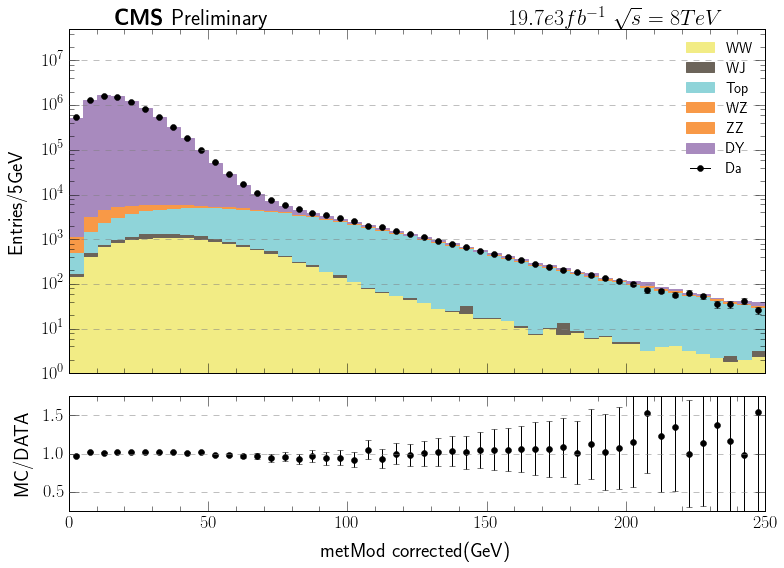

In [5]:
alpha = 1.059
a = df.metMod.values * 1.
a[ df.process.values == "DY"]= a[ df.process.values == "DY"] * alpha
df["metMod_corrected"] = a

mc = bin_df( df[df.mll > 30], "metMod_corrected",)
da = bin_df( df_da[df_da.mll > 30], "metMod",)


full_plot(mc, da, color="color_1")

# MET Phi Analysis 

In [21]:
alpha = 1.019384555152
a = df.met_phi.values * 1. + alpha
#a[ df.process.values == "DY"]= a[ df.process.values == "DY"] + alpha
a[ a > np.pi ] = a[ a > np.pi ] - 2*np.pi
df["met_phi_corrected"] = a

bins_mc = bin_df( df, "met_phi_corrected", range=(-np.pi, np.pi))
bins_da = bin_df( df_da, "met_phi",range=(-np.pi, np.pi))


for i in range(6):
    tot_mc = np.zeros( bins_mc[ bins_mc.keys()[0] ][0].shape[0] )

    for process in bins_mc.keys():
        if process != "plotting":
            tot_mc += bins_mc[process][0]

    print "iter:", i, ( ( tot_mc  - bins_da["Da"][0])**2 / bins_da["Da"][0]  ).sum(),\
    ( 2*( tot_mc - bins_da["Da"][0]) / bins_da["Da"][0]  ).sum() * 1. / 30.,\
    alpha
    alpha = alpha  +  ( 2*( tot_mc - bins_da["Da"][0]) / bins_da["Da"][0]  ).sum() * 1. / 30.
    a = df.met_phi.values + alpha

    a[ a > np.pi ] = a[ a > np.pi ] - 2*np.pi
    df["met_phi_corrected"] = a
    
    bins_mc = bin_df( df, "met_phi_corrected", range=(-np.pi, np.pi),)

iter: 0 84329.746864 0.0294338929135 1.01938455515
iter: 1 84447.0075169 0.0294450629647 1.04881844807
iter: 2 85087.9611584 0.0295653663697 1.07826351103
iter: 3 86386.012114 0.029798610622 1.1078288774
iter: 4 88288.1007747 0.0301827952471 1.13762748802
iter: 5 90670.5603459 0.0306482357411 1.16781028327


1 / 100
iter: 0 381129.689454 0.0261044070145 0.01
iter: 1 367150.958604 0.0252947721002 0.0361044070145
iter: 2 353922.805488 0.0245248190352 0.0613991791147
iter: 3 341337.789687 0.0237957235476 0.0859239981499
iter: 4 329225.381462 0.0230891651892 0.109719721697
iter: 5 317767.160623 0.0224294589716 0.132808886887

1 / 100
iter: 0 319156.356933 0.022507669135 0.13
iter: 1 308056.25158 0.0218675626005 0.152507669135
iter: 2 297611.20041 0.0212562681977 0.174375231735
iter: 3 287639.583018 0.0206824829586 0.195631499933
iter: 4 278134.526446 0.0201242842249 0.216313982892
iter: 5 268925.926761 0.0195869381033 0.236438267117

1 / 100
iter: 0 278072.783473 0.0201203570595 0.216438267117
iter: 1 268875.601108 0.0195840701433 0.236558624177
iter: 2 260272.45843 0.019087400988 0.25614269432
iter: 3 251933.103385 0.0186067630428 0.275230095308
iter: 4 244041.814989 0.018148633485 0.293836858351
iter: 5 236477.326881 0.0177042577783 0.311985491836

1 / 70
iter: 0 240609.056383 0.0256327278061 0.301985491836
iter: 1 230134.868224 0.0247658225603 0.327618219642
iter: 2 220324.297086 0.0239459913707 0.352384042202
iter: 3 210973.255408 0.0231690721337 0.376330033573
iter: 4 202364.075656 0.0224613349473 0.399499105707
iter: 5 194234.760889 0.0217812418701 0.421960440654

1 / 50
iter: 0 197783.096726 0.030911799816 0.411960440654
iter: 1 186932.863298 0.0296412557194 0.44287224047
iter: 2 177018.158725 0.0284804367221 0.472513496189
iter: 3 167792.646874 0.0274080031599 0.500993932911
iter: 4 159507.255563 0.0264500005121 0.528401936071
iter: 5 151790.734294 0.0255409578249 0.554851936583

iter: 0 154705.512094 0.0258923034597 0.544851936583
iter: 1 147406.558871 0.0250405272144 0.570744240043
iter: 2 140720.070514 0.0242480417458 0.595784767257
iter: 3 134544.288539 0.0235331434974 0.620032809003
iter: 4 128967.224986 0.0228912167564 0.6435659525
iter: 5 123777.233117 0.0222794449522 0.666457169257

1 / 30
iter: 0 126400.17216 0.037644395334 0.654851936583
iter: 1 118230.917929 0.0360373912466 0.692496331917
iter: 2 111457.677768 0.0347163832186 0.728533723164
iter: 3 105451.028995 0.0335598496451 0.763250106382
iter: 4 100381.201118 0.0325745991249 0.796809956027
iter: 5 96028.8674008 0.0317187117597 0.829384555152

iter: 0 97256.3411288 0.0319501412369 0.819384555152
iter: 1 93529.9544317 0.0312137607689 0.851334696389
iter: 2 90455.0808164 0.0306148304344 0.882548457158
iter: 3 88119.2223622 0.0301845715978 0.913163287592
iter: 4 86218.7744158 0.029789397933 0.94334785919
iter: 5 85039.8338347 0.0295494024406 0.973137257123



(<matplotlib.figure.Figure at 0x1deb24390>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x25e8ea710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x25de7f250>], dtype=object))

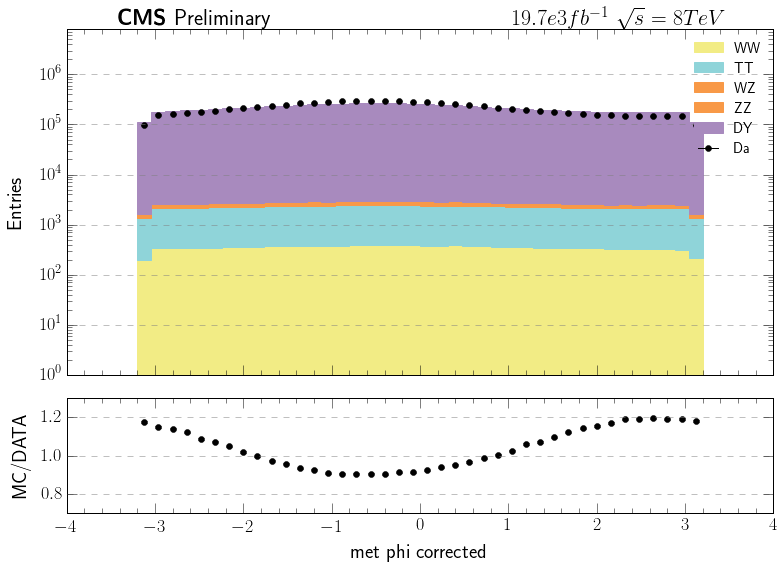

In [22]:
alpha = 1.019384555152
a = df.met_phi.values * 1. + alpha
#a[ df.process.values == "DY"]= a[ df.process.values == "DY"] + alpha
a[ a > np.pi ] = a[ a > np.pi ] - 2*np.pi
df["met_phi_corrected"] = a

mc = bin_df( df[df.mll > 30], "met_phi_corrected",)
da = bin_df( df_da[df_da.mll > 30], "met_phi",)


full_plot(mc, da, color="color_1")

In [18]:
len(df.keys())

68

In [25]:
mc["WGToLNuG"]

[array([   0.        ,    0.        ,  175.23445129,  399.10742188,
         176.4750061 ,  258.78903198,  233.62347412,  117.49255371,
         164.92575073,  147.09979248,  175.0259552 ,  147.76445007,
         105.2164917 ,  104.07352448,   42.10005188,   95.98495483,
         111.0502243 ,   25.90793419,   79.02098846,   64.44898224,
           0.        ,   74.7658844 ,   31.5615139 ,   41.04443359,
          35.57968903,   27.80767059,    9.66255474,   36.84138107,
          12.57389545,   27.51501846,   12.32215309,   13.73564911,
           9.4321785 ,    0.        ,    0.        ,   26.23135567,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,   14.02098942,
           0.        ,    0.        ,    0.        ,    0.        ,
          27.93353844,    0.        ], dtype=float32),
 array([  10.,   18.,   26.,   34.,   42.,   50.,   58.,   66.,   74.,
          82.,   90.,   98.,  106.,  114.,  122.,  130.,  

# End

In [2]:
rp.read_root?